In [1]:
# Social_Network_Ads.csv is the source file

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Importing the dataset**

In [3]:
df= pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

###EDA

Text(0, 0.5, 'EstimatedSalary')

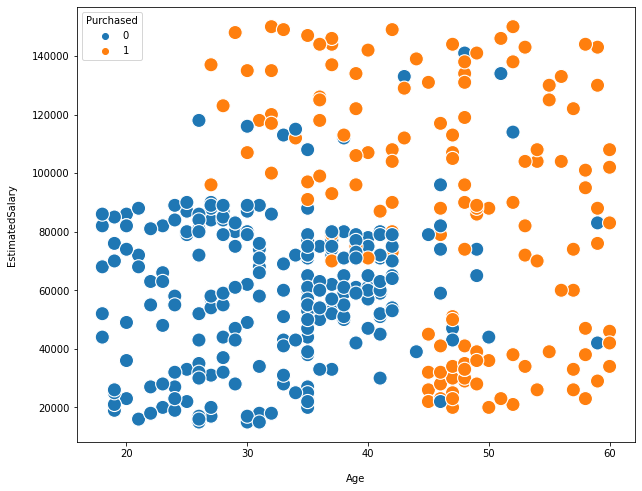

In [8]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.xlabel("Age", labelpad=15)
plt.ylabel("EstimatedSalary", labelpad=15)



*  As increasing in age, estimated salary also increases

*  With increasing in age, more people purchase car

*  Below 25, no one purchase car  





**Splitting the dataset into the Training set and Test set**

In [9]:
X= df[["Age","EstimatedSalary"]].values
Y= df["Purchased"].values

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [12]:
from sklearn.linear_model import LogisticRegression  
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,Y_train) 

LogisticRegression()

**Step 3 | Predection**

In [13]:
y_pred=  logistic_regression.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

**Check** with another value

In [14]:
pred= logistic_regression.predict_proba(X_test)
pred

array([[0.56317448, 0.43682552],
       [0.7497482 , 0.2502518 ],
       [0.37451392, 0.62548608],
       [0.44496889, 0.55503111],
       [0.99079958, 0.00920042],
       [0.14870856, 0.85129144],
       [0.82864083, 0.17135917],
       [0.47544306, 0.52455694],
       [0.86718809, 0.13281191],
       [0.6651559 , 0.3348441 ],
       [0.65556267, 0.34443733],
       [0.87162648, 0.12837352],
       [0.00531024, 0.99468976],
       [0.16364632, 0.83635368],
       [0.67276432, 0.32723568],
       [0.70926419, 0.29073581],
       [0.92096481, 0.07903519],
       [0.98473822, 0.01526178],
       [0.9859841 , 0.0140159 ],
       [0.29354401, 0.70645599],
       [0.97523789, 0.02476211],
       [0.98730661, 0.01269339],
       [0.72602685, 0.27397315],
       [0.01899675, 0.98100325],
       [0.07719782, 0.92280218],
       [0.83035165, 0.16964835],
       [0.77901782, 0.22098218],
       [0.23083587, 0.76916413],
       [0.50075468, 0.49924532],
       [0.92190379, 0.07809621],
       [0.

In [15]:
logistic_regression.coef_

array([[2.15888323, 1.04635112]])

In [16]:
logistic_regression.intercept_

array([-1.05826347])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [17]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


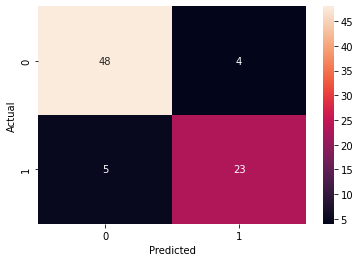

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**EVALUATION METRICS**

In [19]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, f1_score


F1 **Score**

In [20]:
f1_score= f1_score(Y_test,y_pred)
f1_score

0.8363636363636364

**Accuracy**

In [21]:
 Accuracy = logistic_regression.score(X_test,Y_test)
 Accuracy

0.8875

**AUROC**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


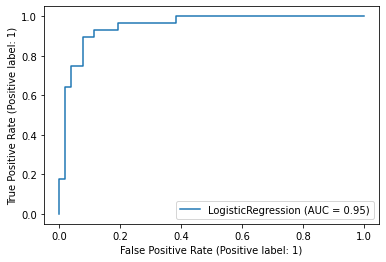

In [22]:
plot_roc_curve(logistic_regression, X_test, Y_test)

In [23]:
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(Y_test, pred[:,1])
auroc

0.9512362637362638

Good AUROC value